# Machine Learning and Statistics Assignment 

## Autumn/Winter 2021

---

### Part 1 - scikit-learn

---

<br>

![scikit_logo](./Images/scikit-learn-logo.png)

<br>

### Overview of the scikit-learn Python library  
[scikit-learn homepage](https://scikit-learn.org/stable/)

>"Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy." https://en.wikipedia.org/wiki/Scikit-learn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. It started out life as `scikits.learn` developed by French data scientist David Cournapeau, but was rewritten and further developed and the first public release was in 2010. The name scikit comes from SciPy Toolkit.

#### Machine learning

Machine learning considers a set of data values and tries to predict the properties of unknown data based on what has been 'learnt'. It can be broken down into a few categories and subcategories.

>Supervised learning, in which the data comes with additional attributes that we want to predict. This problem can be either:
>
> - classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. 
>
> - regression: if the desired output consists of one or more continuous variables, then the task is called regression.
>
> Unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.  
https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting

<br>

## The Wine dataset
___

I'm going use a wine dataset I discovered online to give an overview of the package and to demonstrate some of the algorithims. It seems to be quite a popular dataset as there are many analyses already published, so I probably won't discover anything new!

The dataset contains details of red and white versions of the Portuguese wine Vinho Verde.

![vinhoVerde](Images/VinhoVerde.png)

We begin by importing all of the necessary libraries.

In [1]:
# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Logistic regression
import sklearn.linear_model as lm

# K nearest neighbours
import sklearn.neighbors as nei

# Train test split
from sklearn.model_selection import train_test_split

# Helper functions
import sklearn.model_selection as mod

# Scaling
from sklearn.preprocessing import StandardScaler

# Fancier, statistical plots
import seaborn as sns

# Classification
from sklearn.metrics import classification_report

# Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn import metrics

# Linear regression
import sklearn.linear_model as lm

# linear regression
from sklearn.linear_model import LinearRegression

# statistics
import scipy.stats as stats

# r2_score module
from sklearn.metrics import r2_score

# mean_squared_error
from sklearn.metrics import mean_squared_error

We set the size and style for all plots.

In [2]:
# set global size for all plots
plt.rcParams["figure.figsize"] = (15,10)

# set global style for all plots
plt.style.use('ggplot')

We load in the data from a csv file with `pandas` and have a look at the first 5 rows.

In [3]:
# Load the wine data set from a URL.
df = pd.read_csv("Data/winequalityN.csv")
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

We use the `.info()` and `.describe()` functions to get a an overview of the data.

In [4]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# check for nulls
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
# data statistics.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

We have 6497 entries in total, but some categories seem to be missing entries - not sure how this will affect things! 
Also we notice some unusually disparate values. The max residual sugar is 65.8 which is sickly sweet and not at all typical of vinho verde! As residual sugar is an important basic component of wine, and one I'm very likely to include in any analysis, I'd be tempted to exclude this as it may skew the figures somewhat. 'Free sulfur dioxide' and 'total sulfur dioxide' also seem to have vast ranges and large standard deviations so I may have to look into those further as well if we end up using them. I'm going to plot the residual sugar values just to see how many values are affected.

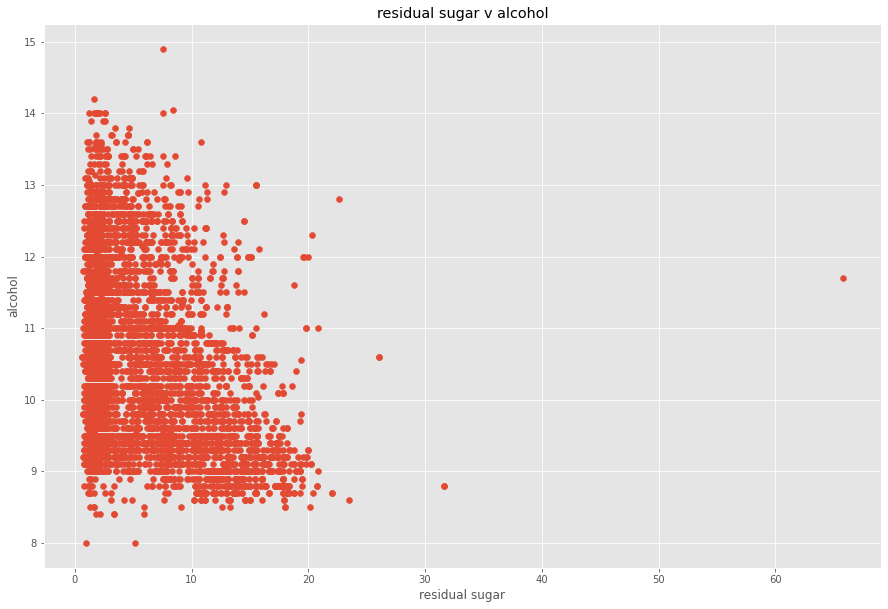

In [7]:
# create variables for x an y axis
x=df['residual sugar']
y=df['alcohol']

# set labels and title
plt.xlabel("residual sugar")
plt.ylabel("alcohol")
plt.title("residual sugar v alcohol")

# create a scatter plot
plt.scatter(x,y);

We can see that it's just one extreme outlier. We'll try to deal with it later once the data is cleaned up further.
<br>

All entries are floating point numbers except 'type' and 'quality'. From the outset it was clear that I'd either be trying to use machine learning to predict whether the wine was white or red, or whether we could predict the quality. I'm assuming that the former of these should be fairly straight forward so I'll concentrate on the latter. We first see what range of quality values we're dealing with using firstly the `.unique()` and `.value_counts()` methods, and then visualising the data in a plot.

In [8]:
# check for unique numbers in quality scores
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [9]:
# value counts for quality
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

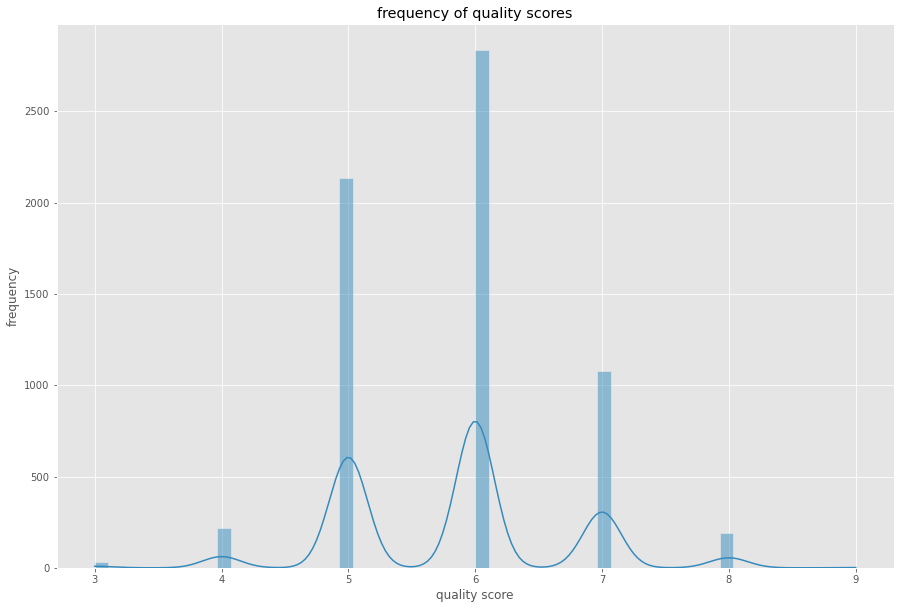

In [10]:
# visualise breakdown of quality scores on a histogram
plt.xlabel("quality score")
plt.ylabel("frequency")
plt.title("frequency of quality scores")
sns.histplot(data=df, x='quality', kde=True);

We can see that the range of scores runs from 3 to 9 with the majority of scores falling around 5,6,7. It has been suggested in other analyses to split the 7 groups into 3 or 2 so I might try that. With only 5 entries out of 6497, it would be unreasonable to expet the model to identify a 9 scoring wine!  
Then we look at the breakdown of red and white.

In [11]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

I think we'll concentrate on just white wine. In theory red and white wine should have much different parameters so I don't think it'll be very helpful to consider them together. So we create a new dataset with just the white wines.

In [12]:
# separate the white wines
dfnew = df.loc[df['type'] == "white"]

# print out the new head
dfnew.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [13]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


We no longer need the 'type' column so I'll delete that.

In [14]:
dfnew = dfnew.drop(columns=['type'])
dfnew.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Now to deal with the null values. It was suggested to fill these in with average values. The following code is from https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/

In [15]:
# fill all nulls with mean values
dfnew.update(dfnew.fillna(dfnew.mean()))

In [16]:
# check to see if it worked
dfnew.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Now that we've cleaned up the data somewhat I want to deal with that outlier. The following code will remove any values more than 4 standard deviations from the mean. Taken from https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

In [17]:
# calculate z-scores of `df`
z_scores = stats.zscore(dfnew)

# get absolute values of z-scores
abs_z_scores = np.abs(z_scores)

# filter entries to remove values more than 4 SDs from mean
filtered_entries = (abs_z_scores < 4).all(axis=1)

# save new version
dfnew = dfnew[filtered_entries]

And just to check it worked:

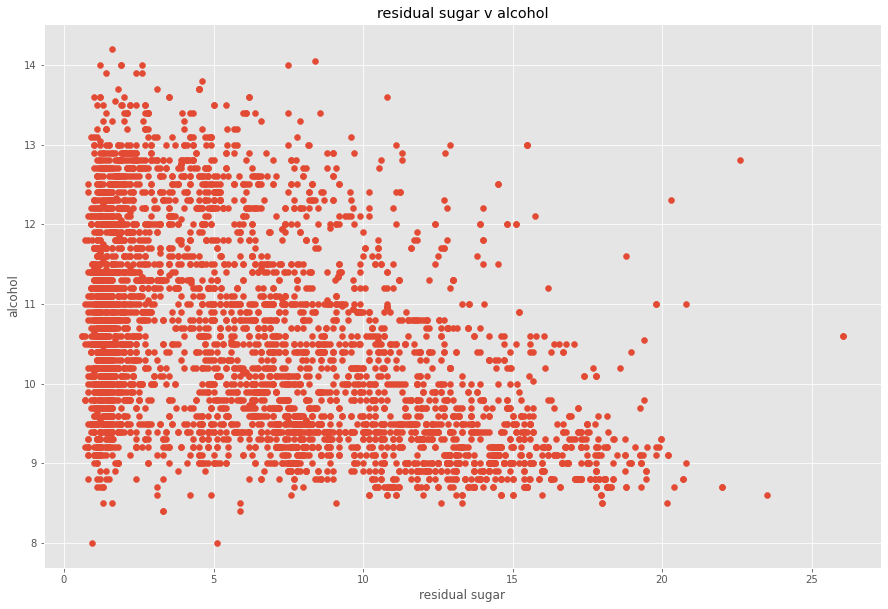

In [18]:
# create variables for scatter plot
x = dfnew['residual sugar']
y = dfnew['alcohol']

# set labels and title
plt.xlabel("residual sugar")
plt.ylabel("alcohol")
plt.title("residual sugar v alcohol")

# create scatter plot
plt.scatter(x,y);

We'll take a look at the **correlation** now with a heatmap using `seaborn`.

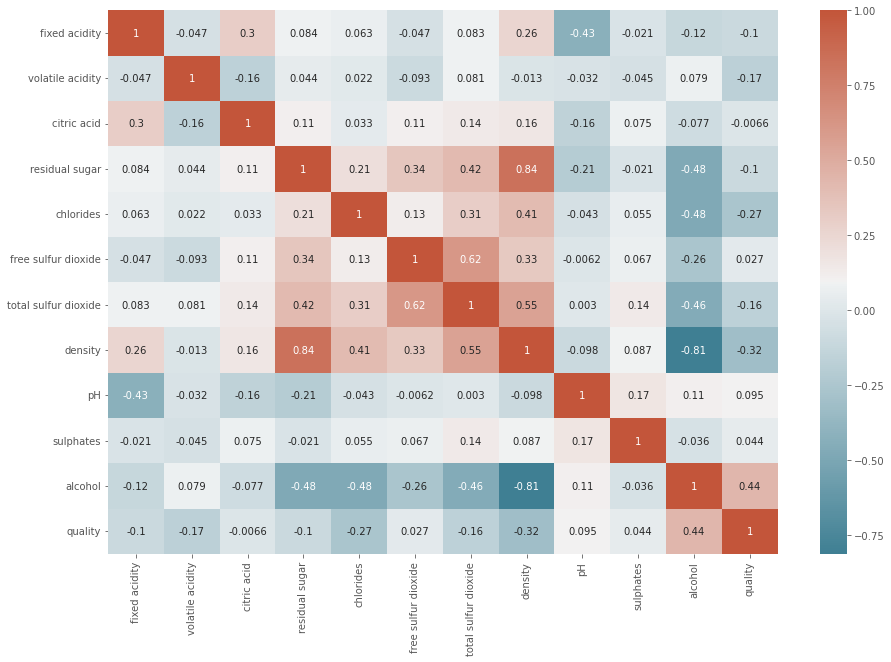

In [19]:
# visualise correlation
corr = dfnew[dfnew.columns].corr()
sns.heatmap(corr, annot = True, cmap=sns.diverging_palette(220, 20, as_cmap=True));

The darker red squares represent a higher correlation between variables so we can see a few notable instances here. We will come back to this later.

<br>

---

### Classificaton

---

We going to rationalise the 'quality' column into 2 - 'wine' and 'better wine'. Better wine will have a score of 7 or higher. The following code creates a new column and then separates the betterQuality column from the rest of the dataframe. The betterQuality column will just be 0 or 1.

In [20]:
# Create Classification version of target variable
dfnew['betterQuality'] = [1 if x >= 7 else 0 for x in dfnew['quality']]

In [21]:
# count values in new column
dfnew['betterQuality'].value_counts()

0    3694
1    1045
Name: betterQuality, dtype: int64

In [22]:
dfnew.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  betterQuality  
0      8.8        6              0  
1      9.5        6              0  
2     10.1        6              0  
3      9.9        6              0  
4      9.9        6              0

We'll take a look at the means for each of the variables when we separate the two wine quality levels. We can see a significant difference in 'residual sugar', 'chlorides' 'total sulfur dioxide', and 'alcohol'. We will be focussing on this later.

In [23]:
# look at the descriptive statistics for the 2 wine qualities
dfnew.groupby('betterQuality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
betterQuality                                                                 
0                   6.883132          0.277584     0.332347        6.729221   
1                   6.730819          0.265743     0.325971        5.304156   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
betterQuality                                                                   
0               0.045221            35.197347            141.504331  0.994449   
1               0.038057            34.173684            125.081340  0.992415   

                     pH  sulphates    alcohol   quality  
betterQuality                                            
0              3.182456   0.485788  10.274977  5.528966  
1              3.214370   0.495311  11.424242  7.174163

<br>

___


### K-Nearest Neighbor

___

>"*In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression.*" https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

**K-Nearest Neighbor** is a supervised classification algorithm used to assign a class to a new data point. The basic premise is that for every data point, its nearest neighbours are mapped and used to identify it. If we want to know the classification for a new data point, the algorithim will give us an answer based on the majority of its nearest neighbours. We can change the `n_neighbours` parameter for the algorithim to take in as many or as little neighbours as neccessary. Unlike some of the tests and algorithims we will demonstrate later, there is no need for any training data here. It is sometimes called a lazy learner! If we want though, we can splt the data up - a portion to train the algorithim and then some data to test the accuracy. We will attempt that after.

We begin by separating the dependent and independent variables.

In [24]:
# Separate the dependent and independent variables
X = dfnew.drop(['quality','betterQuality'], axis = 1)
y = dfnew['betterQuality']
X.count()

fixed acidity           4739
volatile acidity        4739
citric acid             4739
residual sugar          4739
chlorides               4739
free sulfur dioxide     4739
total sulfur dioxide    4739
density                 4739
pH                      4739
sulphates               4739
alcohol                 4739
dtype: int64

For this test, I changed the `n_neighbours` parameter a few times and settled on 3.

In [25]:
# create the classifier
knn = nei.KNeighborsClassifier(n_neighbors=3)

In [26]:
# fit the classifier
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# pick an entry to test
dfnew.loc[34]

fixed acidity             5.8000
volatile acidity          0.2700
citric acid               0.2000
residual sugar           14.9500
chlorides                 0.0440
free sulfur dioxide      22.0000
total sulfur dioxide    179.0000
density                   0.9962
pH                        3.3700
sulphates                 0.3700
alcohol                  10.2000
quality                   5.0000
betterQuality             0.0000
Name: 34, dtype: float64

In [28]:
# entry test entries values to check
knn.predict([[5.8, 0.27, 2.00, 14.95, 0.044, 22, 179, 0.9962, 3.37, 0.37, 10.2]])

array([0])

Correct!!!

### Evaluate

We can check the accuracy with the `.score()` function. The code below checks the score, and also adds up the amount of wines identified correctly and prints the results in a string.

In [29]:
# checking the accuracy
x = knn.score(X, y)

# Counts the amount of Trues (1) and adds them up
y = (knn.predict(X) == y).sum()

print(f"The accuracy of the test was {x:.2f} and {y} out of 4739 wines were guessed correctly")

The accuracy of the test was 0.89 and 4220 out of 4739 wines were guessed correctly


<br>

---

### train_test_split()

---

We're going to split up the data now into test and training portions using the `train_test_split()` function. We use the training data to train the classifier, and then the test data to test it. The default split is 0.75/0.25 but we can customise if necessary.

In [30]:
# Split the data frame in two.
train, test = mod.train_test_split(dfnew)

In [31]:
# just to double-check the size of train and test data
print(len(train.index))
print(len(test.index))

3554
1185


We can visualise the training and test data on a scatter plot.

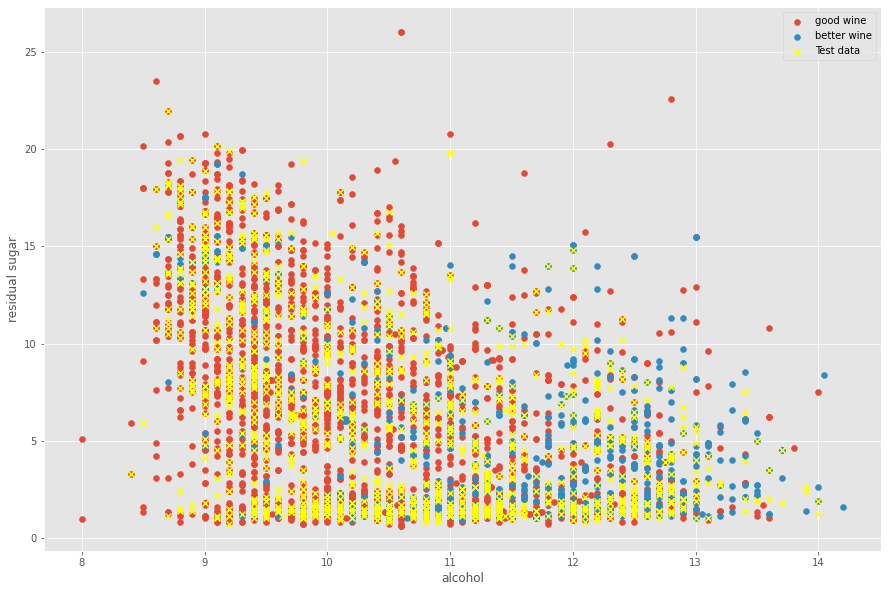

In [32]:
good = train[train['betterQuality'] == 0]
better = train[train['betterQuality'] == 1]

# New plot
fig, ax = plt.subplots()

# change the figure size
plt.rcParams["figure.figsize"] = (15,20)

# Scatter plots for training data.
ax.scatter(good['alcohol'], good['residual sugar'], marker='o', label='good wine')
ax.scatter(better['alcohol'], better['residual sugar'], marker='o', label='better wine')

# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['residual sugar'], marker='x', label='Test data', color='yellow')

# Show the legend.
ax.set_xlabel('alcohol')
ax.set_ylabel('residual sugar')
ax.legend();

For this attempt at the `knn` test, we're just going to use the 4 inputs identified above.

In [33]:
# Use all four possible inputs.
inputs, outputs = train[['alcohol', 'residual sugar', 'chlorides', 'total sulfur dioxide']], train['betterQuality']

We create the classifier.

In [34]:
# create the classifier.
knn = nei.KNeighborsClassifier()

We `fit` the training data.

In [35]:
# fit the inputs and outputs
knn.fit(inputs, outputs)

KNeighborsClassifier()

Then we test with the test data and see what the `score` is.

In [36]:
# test the results
knn.score(test[['alcohol', 'residual sugar', 'chlorides', 'total sulfur dioxide']], test['betterQuality'])

0.7831223628691983

`predict()` will tell us how many data points were accurately predicted - `True`

In [37]:
# Predict
predictions = knn.predict(test[['alcohol', 'residual sugar', 'chlorides', 'total sulfur dioxide']])
(predictions == test['betterQuality']).value_counts()

True     928
False    257
Name: betterQuality, dtype: int64

Below is the same data as a relative frequency or percentage.

In [38]:
# The score is just the accuracy in this case.
(predictions == test['betterQuality']).value_counts(normalize=True)

True     0.783122
False    0.216878
Name: betterQuality, dtype: float64

<br>

---

### Decision trees and Random forests

---

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). Random Forest is another tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions.

#### Standardizing the data

It is recomended to standardise the data in advance of these further tests. This transforms the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [39]:
# Separate dependent variables and independent variable
X = dfnew.drop(['quality','betterQuality'], axis = 1)
y = dfnew['betterQuality']

In [40]:
# standarise the data
X_features = X
X = StandardScaler().fit_transform(X)

#### Splitting the data

We again split the data into a training sample and a test sample.

In [41]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

>"Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation."  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

We can now create a decision tree classifier model to test the data.

In [42]:
# create a classifier
model1 = DecisionTreeClassifier()

# fit the model
model1.fit(X_train, y_train)

# predict
y_pred1 = model1.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred1))

# print accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       930
           1       0.58      0.65      0.61       255

    accuracy                           0.82      1185
   macro avg       0.74      0.76      0.75      1185
weighted avg       0.83      0.82      0.83      1185

Accuracy: 0.8219409282700422


>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
>
>The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
>
>The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
>
>The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
>
>The support is the number of occurrences of each class in y_true.  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

We can change the `max_depth` parameter and we can sometimes get a higher accuracy score. Although we have to be careful as a higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [43]:
model1 = DecisionTreeClassifier(criterion="entropy", max_depth=15)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8396624472573839



>"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree."  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

We'll try the random forest classifier next.

In [44]:
# random forest classifier
model2 = RandomForestClassifier(random_state=1)

# fit the model
model2.fit(X_train, y_train)

# predict
y_pred2 = model2.predict(X_test)

# print the results
print(classification_report(y_test, y_pred2))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       930
           1       0.81      0.59      0.68       255

    accuracy                           0.88      1185
   macro avg       0.85      0.77      0.80      1185
weighted avg       0.88      0.88      0.87      1185

Accuracy: 0.8810126582278481


We get a higher accuracy with the random forest so in this situation that's the way to go!

<br>

---

### Regression

---

Linear regression can be thought of as finding the straight line that best fits a set of scattered data points. To see if this data might be appropriate we can visualise the data in a pairplot to see if any linear relationships or correlation are jumping out. A pairplot compares all of the variables against each other. (I've dropped the 2 quality columns as they aren't relevent to this test.) 

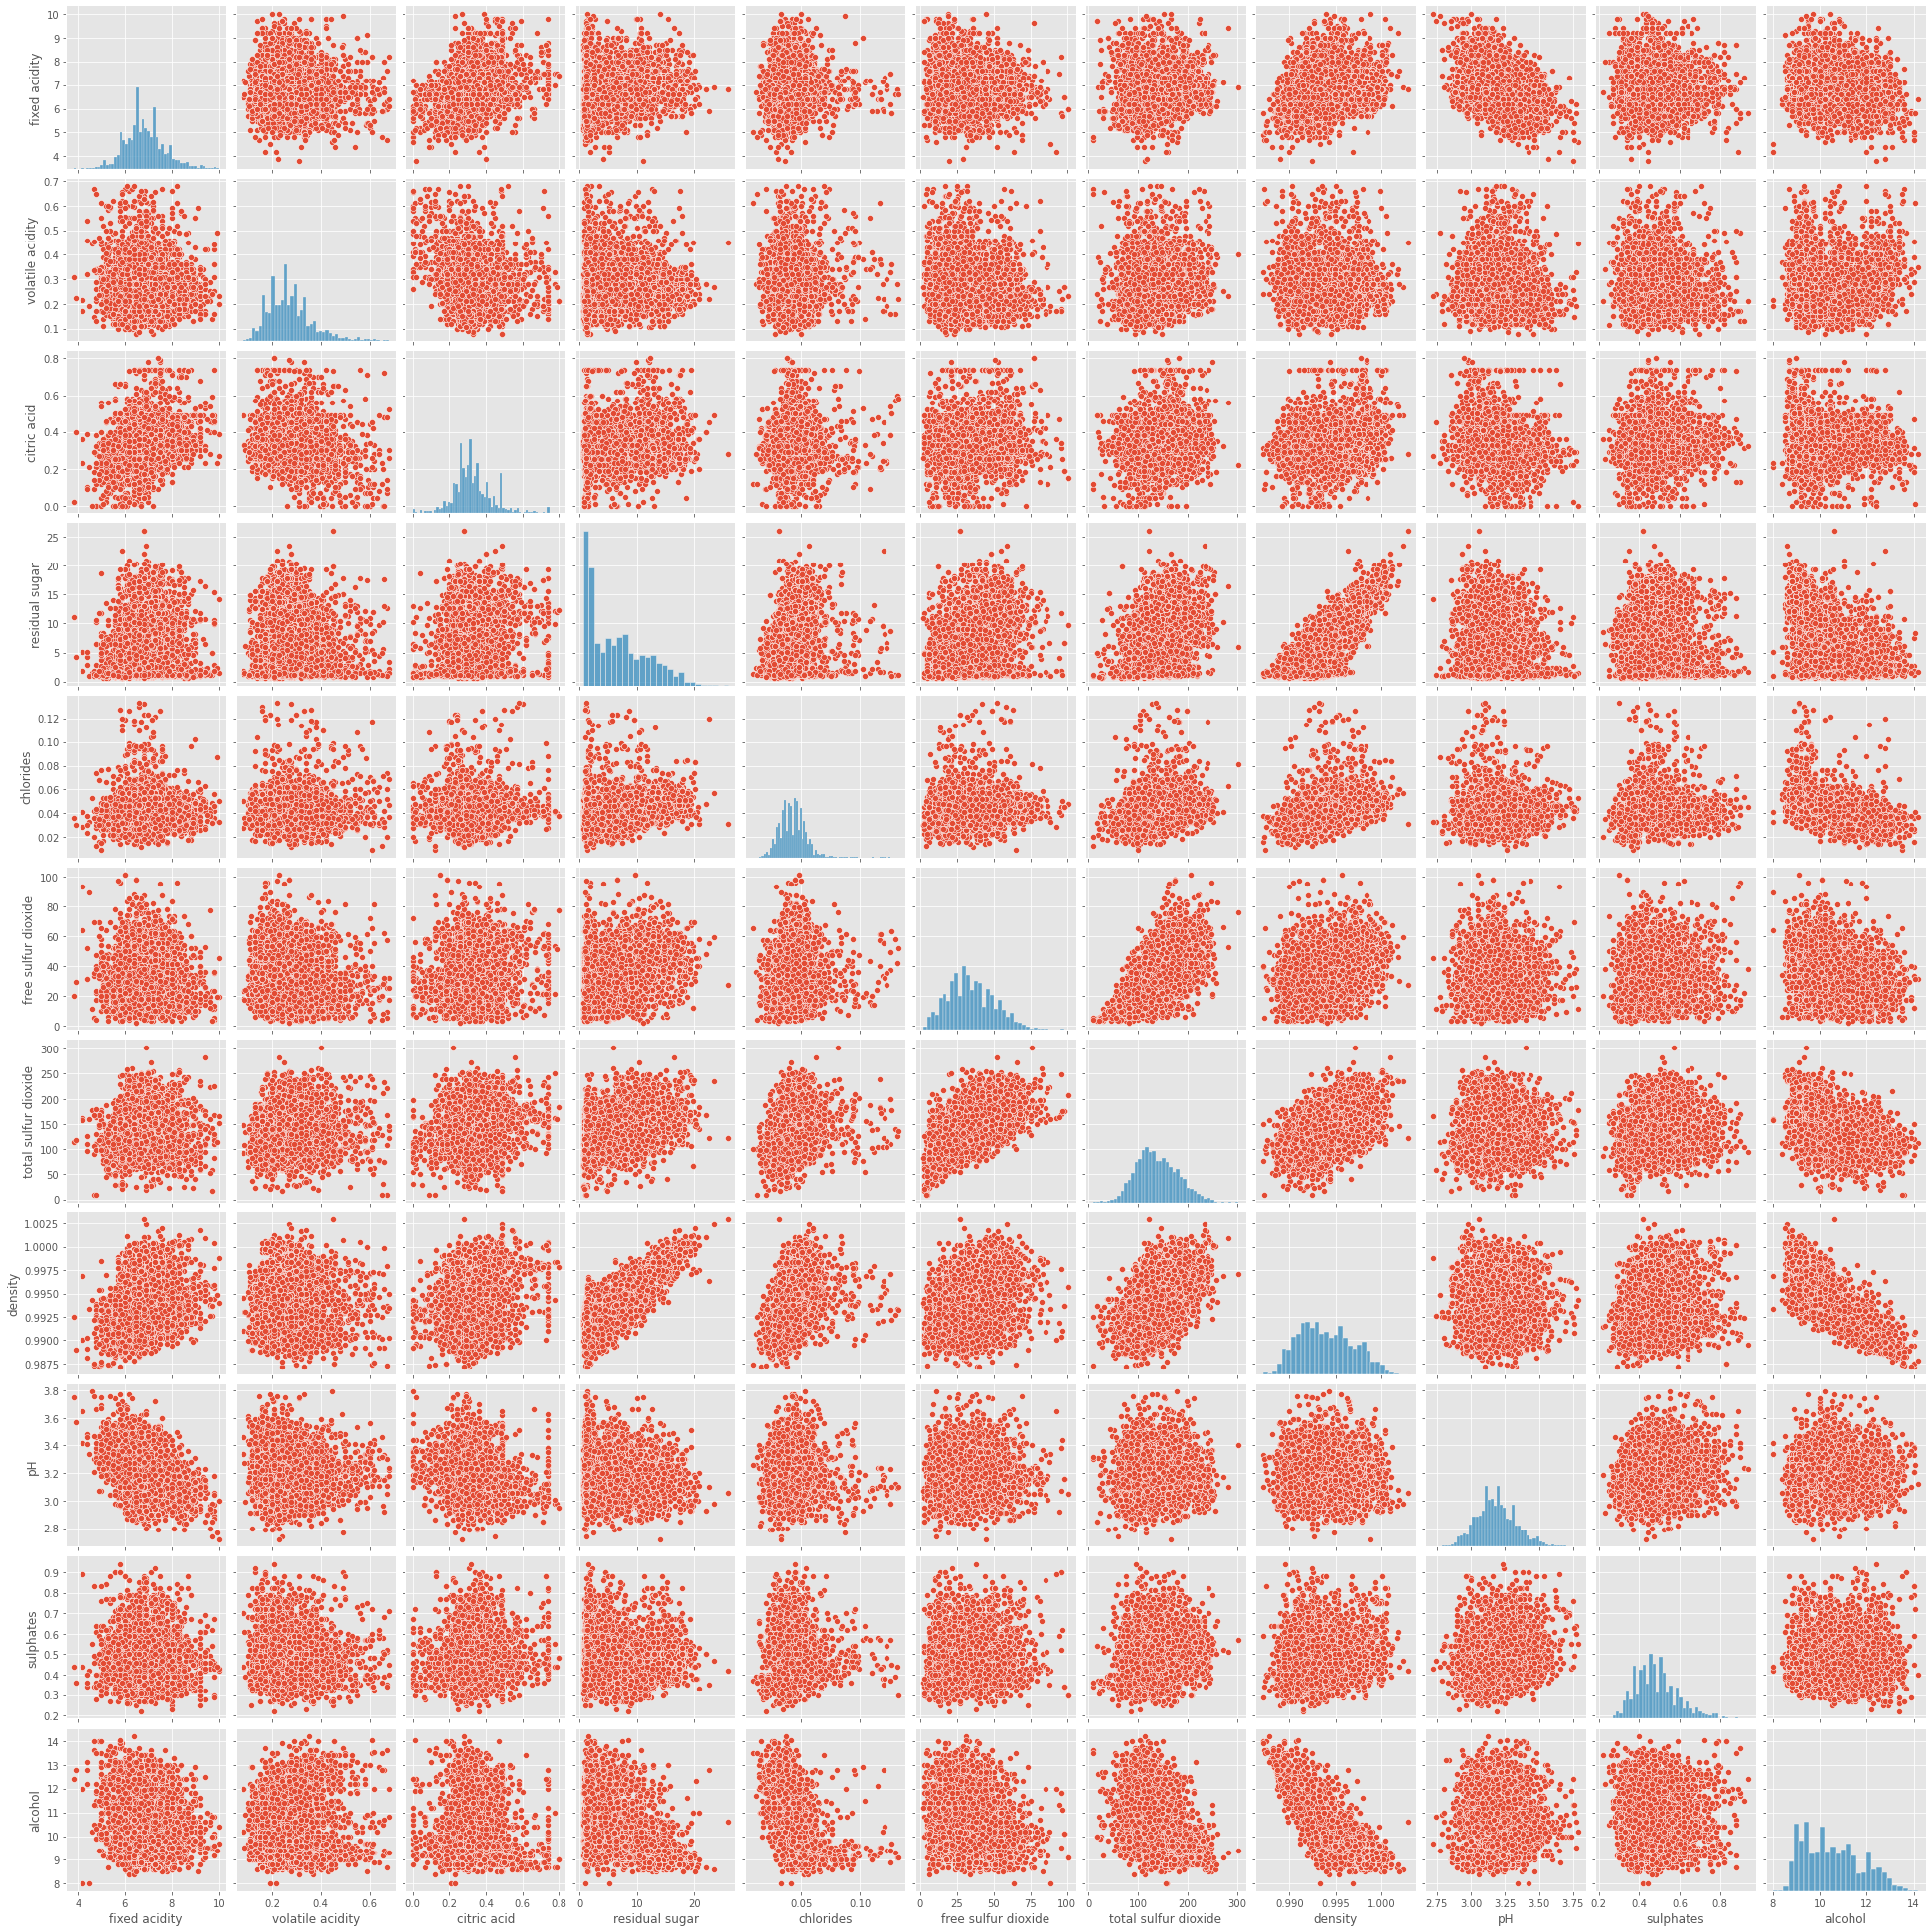

In [45]:
Z = dfnew.drop(['quality','betterQuality'], axis = 1)
sns.pairplot(Z);

We can see that 'residual sugar' & 'density', 'alcohol' & 'density', and 'total sulfur dioxide' & 'density' might be suitable. Let's look at some of these on scatter plots with best fit lines.

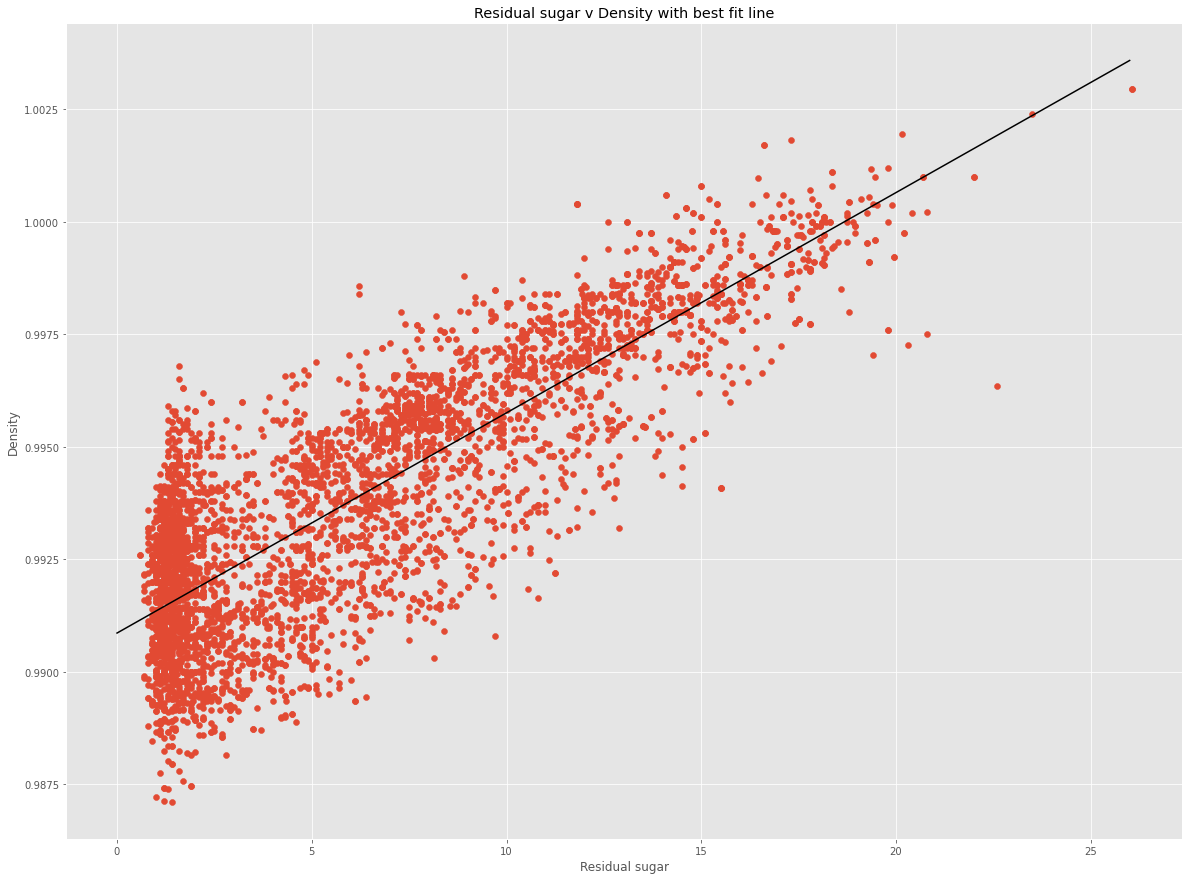

In [46]:
# change the figure size
plt.rcParams["figure.figsize"] = (20,15)

# convert data to numpy
x = dfnew['residual sugar'].to_numpy()
y = dfnew['density'].to_numpy()

# Create a linear regression model and predict a best fit
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 26, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot the data and estimated linear regression line with matplotlib:
plt.title("Residual sugar v Density with best fit line")
plt.xlabel("Residual sugar")
plt.ylabel("Density")
plt.scatter(x, y)
plt.plot(xfit, yfit, color='k');
plt.show()

We'll do the same with alcohol and density

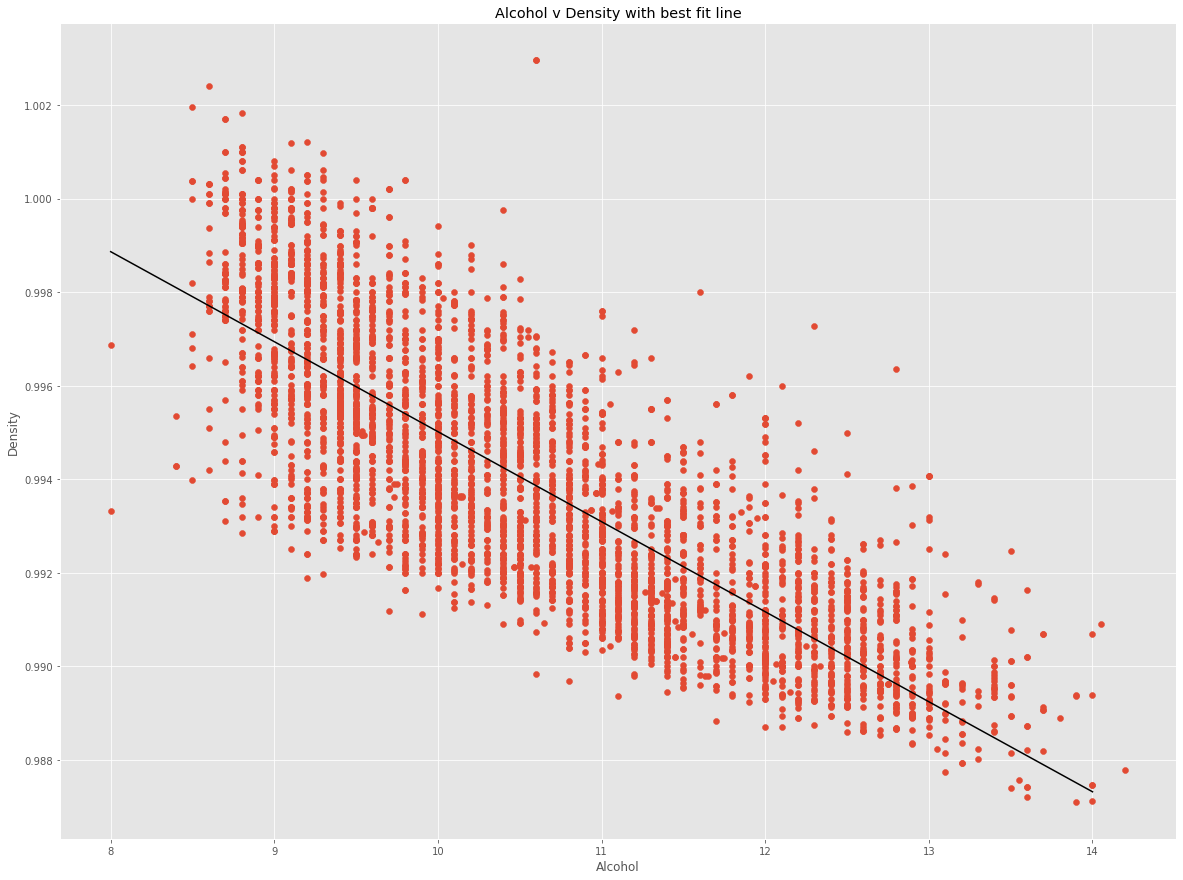

In [47]:
# convert variables to numpy arrays
x = dfnew['alcohol'].to_numpy()
y = dfnew['density'].to_numpy()

# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(8, 14, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot the estimated linear regression line with matplotlib:
plt.title("Alcohol v Density with best fit line")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.scatter(x, y)
plt.plot(xfit, yfit, color='k');
plt.show()

The first plot and best fit line show a positive corretation while the 2nd shows a negative correlation.

<br>

---

#### Multiple Linear Regression

---

We can also carry out regression using more than 1 independent variable. We'll look at the 4 variables indentified above in the correlation function.

In [48]:
# Create a linear regression model
m = lm.LinearRegression()

# choosing the variables
X = dfnew[['residual sugar', 'total sulfur dioxide', 'chlorides', 'alcohol', 'density']]
y = dfnew['betterQuality']

In [49]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
# fitting the data.
m.fit(X_train, y_train)

LinearRegression()

In [51]:
y_prediction =  m.predict(X_test)

In [52]:
# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print("r2 score: ", score)
print("mean_sqrd_error: =", mean_squared_error(y_test, y_prediction))
print("root_mean_squared error: =", np.sqrt(mean_squared_error(y_test, y_prediction)))

r2 score:  0.15624403533506803
mean_sqrd_error: = 0.14045324413140903
root_mean_squared error: = 0.37477092220636465


This is a relatively low R-squared score but this does not automatically indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data.
The `mean_sqrd_error` score  is relatively OK as we're looking for a value close to 0.
Also of interest is our intercept and coefficients

In [53]:
# intercept and coefficients
print('intercept:', m.intercept_)
print('coefficients', m.coef_)

intercept: 22.865013543296314
coefficients [ 1.55765017e-02  1.40631381e-04 -1.62345052e+00  1.08623266e-01
 -2.39782962e+01]


And our regression score which again isn't brilliant!

In [54]:
# See how good our fit is.
m.score(X_train, y_train)

0.15980612025335195

<br>

___


#### Logistic Regression

---

In [55]:
X = dfnew[['alcohol', 'residual sugar']]
y = dfnew[['betterQuality']]

In [56]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [57]:
X_train.count()

alcohol           3554
residual sugar    3554
dtype: int64

In [58]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
# I was getting an error here so ravel was suggested
lre.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=0)

In [59]:
# Ask the classifier to classify the test data.
predictions = lre.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
# look at the misclassifications.
predictions == test['betterQuality']

3447     True
1048     True
2994    False
3198    False
3296     True
        ...  
797      True
3205    False
432     False
3190    False
917      True
Name: betterQuality, Length: 1185, dtype: bool

In [61]:
# What proportion were correct?
lre.score(X_test, y_test)

0.8219409282700422

In [72]:
# Append a column to the test data frame with the predictions.
# we get a warning but it still seems to work?
test['predicted'] = predictions

/var/folders/x7/mgf0rb1x3z52yr77g_9d0t6w0000gn/T/ipykernel_16072/3731864415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


In [73]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['betterQuality']]
misclass.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2994            6.8              0.18         0.28             9.8      0.039   
3198            6.4              0.22         0.38             9.1      0.044   
2009            8.0              0.40         0.33             7.7      0.034   
649             7.1              0.26         0.34            14.4      0.067   
1388            7.3              0.18         0.29             1.2      0.044   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2994                 29.0                 113.0  0.99406  3.11       0.45   
3198                 35.0                 127.0  0.99326  2.97       0.30   
2009                 27.0                  98.0  0.99350  3.18       0.41   
649                  35.0                 189.0  0.99860  3.07       0.53   
1388                 12.0                 143.0  0.99180  3.20       0.48   

      alcohol  quality  betterQuality  predicted  
2994     10.9        7              1          0  
3198     11.0        7              1          0  
2009     12.2        7              1          0  
649       9.1        7              1          0  
1388     11.3        7              1          0

This final plot shows again all of the wines - good and better - but also circles the misclassified wines.

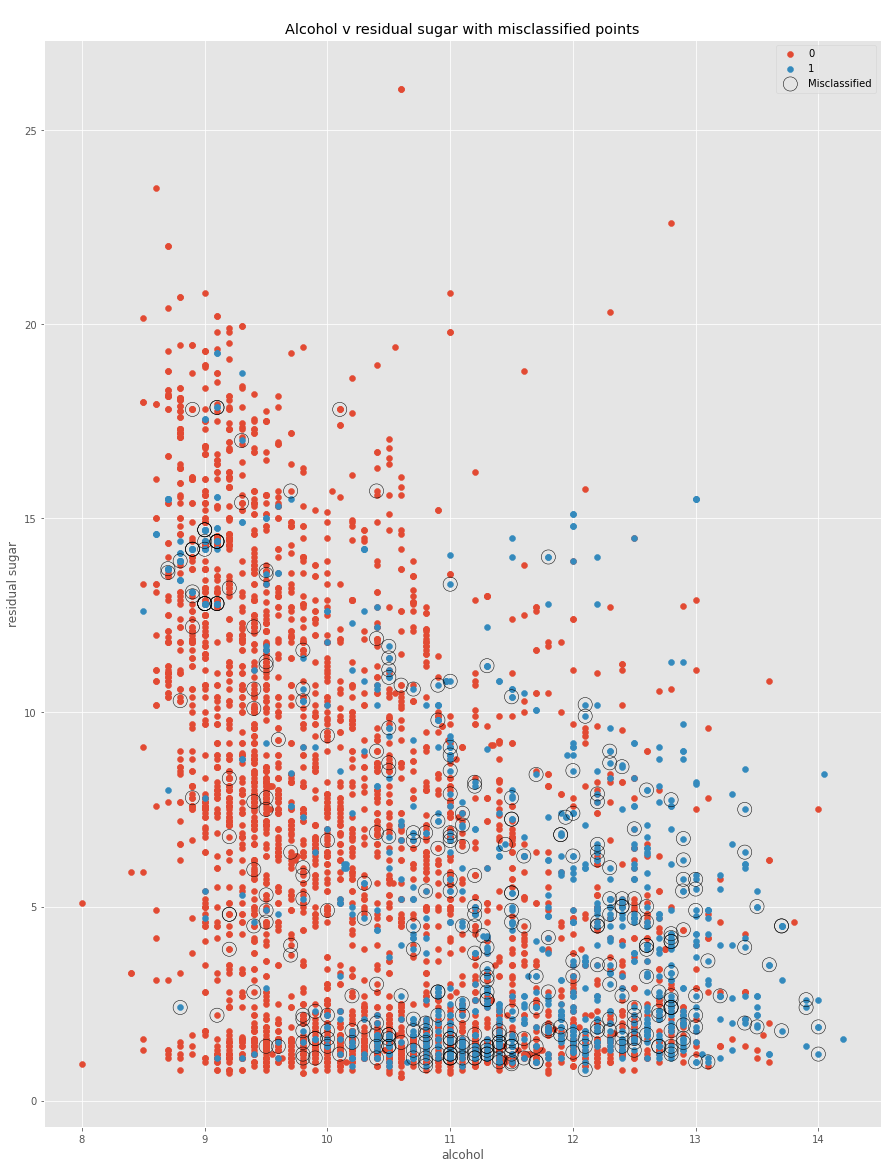

In [71]:
# create plot
fig, ax = plt.subplots()

# set size for plot
plt.rcParams["figure.figsize"] = (15,20)

# Plot the alcohol and residual sugar data
for quality, data in dfnew.groupby('betterQuality'):
    ax.scatter(data['alcohol'], data['residual sugar'], label=quality)

# Plot misclassified wines
ax.scatter(misclass['alcohol'], misclass['residual sugar'], s=200, facecolor='none', edgecolor='k', label='Misclassified')

# set title, labels, and legend
ax.set_title('\nAlcohol v residual sugar with misclassified points')
ax.set_xlabel('alcohol')
ax.set_ylabel('residual sugar')
ax.legend();

___
<br>

### References

seaborn.histplot - https://seaborn.pydata.org/generated/seaborn.histplot.html

Wine quality tutorial - https://notebook.community/karthikrangarajan/intro-to-sklearn/misc/Wine%20Quality%20Python3

Predicting Wine Quality with Several Classification Techniques - https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434

Wine Quality Prediction – Machine Learning - https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/

Python machine learning tutorial - https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

Predicting Wine Quality With Several Classification Techniques - https://dzone.com/articles/predicting-wine-quality-with-several-classificatio

A Statistical Approach on the Wine Dataset - https://medium.com/@erkansahin/a-statistical-approach-on-the-wine-dataset-98a2f7b77975

Regression with assumption check and ANOVA - https://www.kaggle.com/zicodas/regression-with-assumption-check-and-anova

SciPy - Stats - https://www.tutorialspoint.com/scipy/scipy_stats.htm

Scikit-learn wikipedia page - https://en.wikipedia.org/wiki/Scikit-learn

Machine Learning - Scale - https://www.w3schools.com/python/python_ml_scale.asp

Decision Tree - https://www.w3schools.com/python/python_ml_decision_tree.asp

Knn.score and accuracy metrics in KNN - SK learn - https://stackoverflow.com/questions/48018203/what-is-the-difference-between-knn-score-and-accuracy-metrics-in-knn-sk-learn

KNN - https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

How to remove outliers from a Pandas DataFrame - https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

MachineLearning — KNN using scikit-learn - https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

sklearn.model_selection.train_test_split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Decision Tree Classification in Python - https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Multiple Linear Regression Using Python and Scikit-learn - https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

Multiple Linear Regression in Python - https://datatofish.com/multiple-linear-regression-python/

Ravel - https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

# END